# RandomForest(프로모션 효율예측)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. data import

In [4]:
mem = pd.read_csv('./data/member.csv')
tran = pd.read_csv('./data/transaction.csv')

+ mem data

In [5]:
mem.head()

,id,recency,zip_code,is_referral,channel,conversion
0,906145,10,Surburban,0,Phone,0
1,184478,6,Rural,1,Web,0
2,394235,7,Surburban,1,Web,0
3,130152,9,Rural,1,Web,0
4,940352,2,Urban,0,Web,0


In [6]:
mem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64000 entries, 0 to 63999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           64000 non-null  int64 
 1   recency      64000 non-null  int64 
 2   zip_code     64000 non-null  object
 3   is_referral  64000 non-null  int64 
 4   channel      64000 non-null  object
 5   conversion   64000 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 2.9+ MB


In [7]:
mem.describe()

,id,recency,is_referral,conversion
count,64000.000000,64000.000000,64000.000000,64000.000000
mean,550694.137797,5.763734,0.502250,0.146781
std,259105.689773,3.507592,0.499999,0.353890
min,100001.000000,1.000000,0.000000,0.000000
25%,326772.000000,2.000000,0.000000,0.000000
50%,551300.000000,6.000000,1.000000,0.000000
75%,774914.500000,9.000000,1.000000,0.000000
max,999997.000000,12.000000,1.000000,1.000000


+ train data

In [8]:
tran.head()

,id,num_item,total_amount
0,906145,5,34000
1,906145,1,27000
2,906145,4,33000
3,184478,4,29000
4,394235,4,33000


In [9]:
tran.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196836 entries, 0 to 196835
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype
---  ------        --------------   -----
 0   id            196836 non-null  int64
 1   num_item      196836 non-null  int64
 2   total_amount  196836 non-null  int64
dtypes: int64(3)
memory usage: 4.5 MB


In [10]:
tran.describe()

,id,num_item,total_amount
count,196836.000000,196836.000000,196836.000000
mean,550557.552932,3.078365,21837.102969
std,259254.795613,1.478408,8218.005565
min,100001.000000,1.000000,8000.000000
25%,326719.000000,2.000000,15000.000000
50%,550918.000000,3.000000,22000.000000
75%,774916.000000,4.000000,29000.000000
max,999997.000000,6.000000,38000.000000


In [11]:
tran

,id,num_item,total_amount
0,906145,5,34000
1,906145,1,27000
2,906145,4,33000
3,184478,4,29000
4,394235,4,33000
...,...,...,...
196831,536246,5,24000
196832,927617,5,26000
196833,927617,3,22000
196834,927617,3,18000


In [12]:
tran['avg_price'] = tran['total_amount']/tran['num_item']  # item 평균가격

In [13]:
tran

,id,num_item,total_amount,avg_price
0,906145,5,34000,6800.000000
1,906145,1,27000,27000.000000
2,906145,4,33000,8250.000000
3,184478,4,29000,7250.000000
4,394235,4,33000,8250.000000
...,...,...,...,...
196831,536246,5,24000,4800.000000
196832,927617,5,26000,5200.000000
196833,927617,3,22000,7333.333333
196834,927617,3,18000,6000.000000


## 2. groupby: id별 data정리

In [14]:
tran_mean = tran.groupby('id').mean()

In [15]:
tran_cnt = tran['id'].value_counts()

In [16]:
tran_mean

,num_item,total_amount,avg_price
id,,,
100001,3.500000,26000.000000,7500.000000
100008,5.000000,26000.000000,5200.000000
100032,2.666667,20666.666667,9366.666667
100036,3.000000,25800.000000,13273.333333
100070,3.250000,21250.000000,8537.500000
...,...,...,...
999932,5.000000,32000.000000,6400.000000
999981,2.000000,22750.000000,12875.000000
999990,3.000000,28000.000000,10388.888889


In [17]:
tran_cnt

446874    5
473857    5
384266    5
648461    5
130318    5
         ..
674652    1
670546    1
192229    1
720615    1
789077    1
Name: id, Length: 64000, dtype: int64

### 3. data combining

#### 1) concat

In [18]:
tran_df = pd.concat([tran_mean,tran_cnt], axis=1)

In [19]:
tran_df.columns = ['num_item', 'total_amount', 'avg_price', 'count']

In [20]:
tran_df.rename(columns={'id': 'count'})

,num_item,total_amount,avg_price,count
100001,3.500000,26000.000000,7500.000000,2
100008,5.000000,26000.000000,5200.000000,1
100032,2.666667,20666.666667,9366.666667,3
100036,3.000000,25800.000000,13273.333333,5
100070,3.250000,21250.000000,8537.500000,4
...,...,...,...,...
999932,5.000000,32000.000000,6400.000000,1
999981,2.000000,22750.000000,12875.000000,4
999990,3.000000,28000.000000,10388.888889,3
999995,2.000000,27000.000000,13500.000000,1


In [21]:
mem

,id,recency,zip_code,is_referral,channel,conversion
0,906145,10,Surburban,0,Phone,0
1,184478,6,Rural,1,Web,0
2,394235,7,Surburban,1,Web,0
3,130152,9,Rural,1,Web,0
4,940352,2,Urban,0,Web,0
...,...,...,...,...,...,...
63995,838295,10,Urban,0,Web,0
63996,547316,5,Urban,1,Phone,0
63997,131575,6,Urban,1,Phone,0
63998,603659,1,Surburban,1,Multichannel,0


In [22]:
mem.set_index('id', inplace = True)

In [23]:
mem

,recency,zip_code,is_referral,channel,conversion
id,,,,,
906145,10,Surburban,0,Phone,0
184478,6,Rural,1,Web,0
394235,7,Surburban,1,Web,0
130152,9,Rural,1,Web,0
940352,2,Urban,0,Web,0
...,...,...,...,...,...
838295,10,Urban,0,Web,0
547316,5,Urban,1,Phone,0
131575,6,Urban,1,Phone,0


#### 2) join

In [24]:
data = mem.join(tran_df)

In [25]:
data

,recency,zip_code,is_referral,channel,conversion,num_item,total_amount,avg_price,count
id,,,,,,,,,
906145,10,Surburban,0,Phone,0,3.333333,31333.333333,14016.666667,3
184478,6,Rural,1,Web,0,4.000000,29000.000000,7250.000000,1
394235,7,Surburban,1,Web,0,4.000000,20500.000000,5125.000000,2
130152,9,Rural,1,Web,0,1.750000,20750.000000,14875.000000,4
940352,2,Urban,0,Web,0,3.000000,31000.000000,10333.333333,1
...,...,...,...,...,...,...,...,...,...
838295,10,Urban,0,Web,0,3.500000,26000.000000,8012.500000,4
547316,5,Urban,1,Phone,0,1.800000,17800.000000,11300.000000,5
131575,6,Urban,1,Phone,0,4.000000,30500.000000,7833.333333,2


In [26]:
data.isnull().sum()/len(data)

recency         0.0
zip_code        0.0
is_referral     0.0
channel         0.0
conversion      0.0
num_item        0.0
total_amount    0.0
avg_price       0.0
count           0.0
dtype: float64

In [27]:
data['zip_code'].nunique()

3

In [28]:
data['channel'].nunique()

3

In [29]:
data['zip_code'].unique()

array(['Surburban', 'Rural', 'Urban'], dtype=object)

In [30]:
data['channel'].unique()

array(['Phone', 'Web', 'Multichannel'], dtype=object)

In [31]:
data = pd.get_dummies(data, columns=['zip_code', 'channel'], drop_first=True) # dummies 생성

In [32]:
data

,recency,is_referral,conversion,num_item,total_amount,avg_price,count,zip_code_Surburban,zip_code_Urban,channel_Phone,channel_Web
id,,,,,,,,,,,
906145,10,0,0,3.333333,31333.333333,14016.666667,3,1,0,1,0
184478,6,1,0,4.000000,29000.000000,7250.000000,1,0,0,0,1
394235,7,1,0,4.000000,20500.000000,5125.000000,2,1,0,0,1
130152,9,1,0,1.750000,20750.000000,14875.000000,4,0,0,0,1
940352,2,0,0,3.000000,31000.000000,10333.333333,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
838295,10,0,0,3.500000,26000.000000,8012.500000,4,0,1,0,1
547316,5,1,0,1.800000,17800.000000,11300.000000,5,0,1,1,0
131575,6,1,0,4.000000,30500.000000,7833.333333,2,0,1,1,0


### 3. data split: train set, test set

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('conversion', axis = 1), data['conversion'], test_size = 30, random_state = 100)

### 4. RandomForest modeling

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
model = RandomForestClassifier(max_depth = 10, random_state = 100)

In [37]:
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=100)

In [39]:
pred = model.predict(X_test)

In [40]:
y_test

id
632233    0
412308    0
184792    0
546903    0
113517    0
956453    0
383850    0
938010    1
336020    0
176965    0
232779    1
207486    0
266086    0
980728    0
602468    0
470309    0
262409    0
598329    0
837450    1
944575    1
943406    1
300466    1
186447    0
715768    0
815223    0
172633    0
315739    0
915683    0
741175    0
133663    0
Name: conversion, dtype: int64

### 4. model accuracy

In [41]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [42]:
accuracy_score(y_test, pred)

0.8

In [44]:
confusion_matrix(y_test, pred)

array([[24,  0],
       [ 6,  0]], dtype=int64)

In [45]:
from sklearn.metrics import classification_report

In [46]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89        24
           1       0.00      0.00      0.00         6

    accuracy                           0.80        30
   macro avg       0.40      0.50      0.44        30
weighted avg       0.64      0.80      0.71        30



c:\users\minky\anaconda3\envs\minky\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 5. Ensemble modeling

In [47]:
 from sklearn.ensemble import RandomForestRegressor  # probability 계산

In [48]:
rf = RandomForestRegressor(max_depth = 10, random_state = 100)

In [49]:
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, random_state=100)

In [51]:
pred = rf.predict(X_test)

In [52]:
pd.DataFrame(pred)

,0
0,0.000000
1,0.052240
2,0.000000
3,0.542863
4,0.078480
5,0.000000
6,0.113931
7,0.105436
8,0.096761
9,0.097504


In [53]:
y_test

id
632233    0
412308    0
184792    0
546903    0
113517    0
956453    0
383850    0
938010    1
336020    0
176965    0
232779    1
207486    0
266086    0
980728    0
602468    0
470309    0
262409    0
598329    0
837450    1
944575    1
943406    1
300466    1
186447    0
715768    0
815223    0
172633    0
315739    0
915683    0
741175    0
133663    0
Name: conversion, dtype: int64

In [54]:
def conv(x):
    if x >= 0.5:
        return 1
    else:
        return 0

In [63]:
pd_result = pd.Series(pred).apply(lambda x: conv(x))

In [64]:
pd_result

0     0
1     0
2     0
3     1
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    1
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
dtype: int64

In [61]:
result = []
for i in pred:
    result.append(conv(i))

In [62]:
result

[0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [78]:
result_com = [1 if x >= 0.5 else 0 for x in pred]

In [79]:
result_com

[0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [80]:
accuracy_score(y_test, result_com)

0.8

In [81]:
confusion_matrix(y_test, result_com)

array([[23,  1],
       [ 5,  1]], dtype=int64)

In [82]:
print(classification_report(y_test, result_com))

              precision    recall  f1-score   support

           0       0.82      0.96      0.88        24
           1       0.50      0.17      0.25         6

    accuracy                           0.80        30
   macro avg       0.66      0.56      0.57        30
weighted avg       0.76      0.80      0.76        30



In [83]:
result_com2 = [1 if x >= 0.3 else 0 for x in pred]

In [84]:
print(classification_report(y_test, result_com2))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90        24
           1       0.67      0.33      0.44         6

    accuracy                           0.83        30
   macro avg       0.76      0.65      0.67        30
weighted avg       0.81      0.83      0.81        30



In [85]:
rf = RandomForestRegressor(max_depth = 10, random_state = 100)
rf.fit(X_train, y_train)
pred = rf.predict(X_test)
result_com = [1 if x >= 0.5 else 0 for x in pred]

accuracy_score(y_test, result_com)

0.8

In [86]:
rf = RandomForestRegressor(max_depth = 12, random_state = 100) # maxdepth 조절
rf.fit(X_train, y_train)
pred = rf.predict(X_test)
result_com = [1 if x >= 0.5 else 0 for x in pred]

accuracy_score(y_test, result_com)

0.8

In [91]:
rf = RandomForestRegressor(n_estimators = 150, max_depth = 12, random_state = 100) # 150개의 Tree
rf.fit(X_train, y_train)
pred = rf.predict(X_test)
result_com = [1 if x >= 0.5 else 0 for x in pred]

accuracy_score(y_test, result_com)

0.8

In [94]:
rf = RandomForestRegressor(n_estimators = 150, max_depth = 12, random_state = 100, min_samples_leaf = 5) # 150개의 Tree
rf.fit(X_train, y_train)
pred = rf.predict(X_test)
result_com = [1 if x >= 0.5 else 0 for x in pred]

accuracy_score(y_test, result_com)

0.8

In [98]:
pd.options.display.float_format = '{:.8f}'.format  # 소수점 아래 2자리까지 표시

### 7) Importance

In [99]:
rf.feature_importances_  # variable importance scores

array([0.0526    , 0.02042876, 0.33850146, 0.15429953, 0.24803793,
       0.15285833, 0.007851  , 0.00732518, 0.00993221, 0.00816561])

In [97]:
X_train.columns  # col names

Index(['recency', 'is_referral', 'num_item', 'total_amount', 'avg_price',
       'count', 'zip_code_Surburban', 'zip_code_Urban', 'channel_Phone',
       'channel_Web'],
      dtype='object')

<AxesSubplot:>

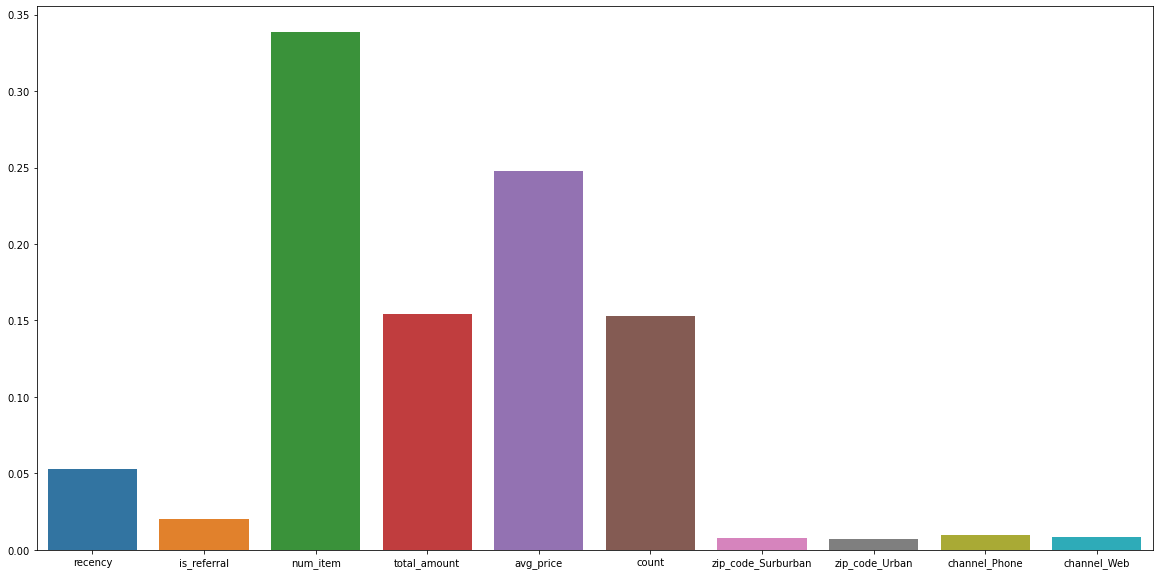

In [102]:
plt.figure(figsize = (20,10))
sns.barplot(x = X_train.columns, y = rf.feature_importances_)